# Instructions

Data: https://s3.amazonaws.com/demo-datasets/beer_reviews.tar.gz
Answer the following questions using the data above. 

(1) Which brewery produces the strongest beers by ABV%?

(2) If you had to pick 3 beers to recommend using only the data in this dataset, which would you pick?

(3) Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

(4) Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

Show your work. I want to clearly understand your thought process for this assignment. You may work in teams of two if you wish.

See also: https://pymotw.com/3/tarfile/index.html#working-with-compressed-archives

See also: https://docs.python.org/3/library/tarfile.html

someone's analysis: https://github.com/lukexyz/Beer-Review-Data-Exploration/blob/master/br_part_1.ipynb

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
beers = pd.read_csv('beer_reviews.csv')

In [3]:
beers.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
beers.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [ ]:
# not sure why this doesn't work
# pd.plotting.scatter_matrix(beers, c = beers.review_overall, figsize=(10, 10))

# Question 1
Which brewery produces the strongest beers by ABV%?

Top 5 & the mean ABV%:<br> 
Schorschbräu                19.228824<br>
Shoes Brewery               15.200000<br>
Rome Brewing Company        13.840000<br>
Hurlimann Brewery           13.750000<br>
Alt-Oberurseler Brauhaus    13.200000<br>

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


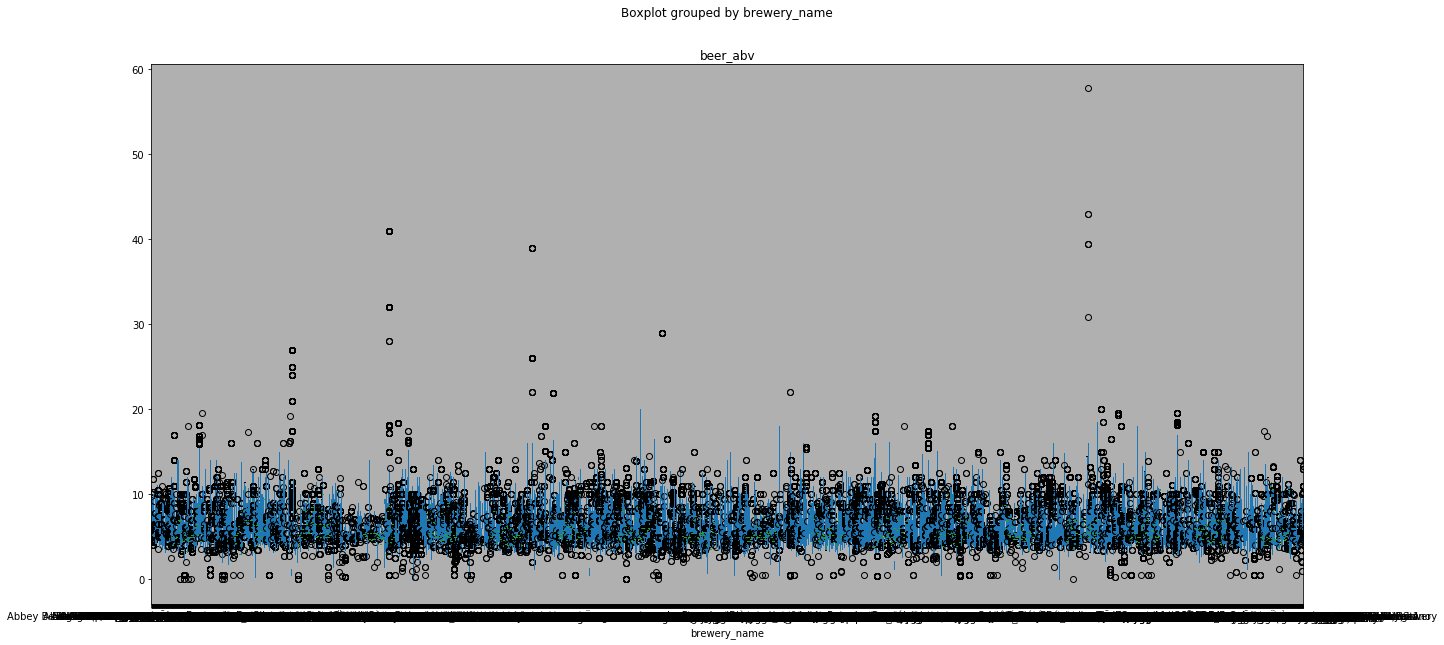

In [5]:
# not sure why this 
#beers.boxplot(column = 'beer_abv', by = 'brewery_name', figsize = (20,10))

In [8]:
strong_beers = beers.groupby('brewery_name')['beer_abv'].mean().sort_values(ascending = False)
strong_beers.head()

brewery_name
Schorschbräu                19.228824
Shoes Brewery               15.200000
Rome Brewing Company        13.840000
Hurlimann Brewery           13.750000
Alt-Oberurseler Brauhaus    13.200000
Name: beer_abv, dtype: float64

# Question 2
Recommendation of 3 beers<br>
My approach: I was going to calculate the sum of all the reviews, but there's a column called "review overall." I have to check that this is the sum (or average) of all the other columns. But if this is so, I would just pick the top three from there.


answer: <br>
Citra DIPA                  4.630952<br>
Heady Topper                4.625800<br>
Trappist Westvleteren 12    4.617925<br>

In [9]:
beers.review_overall.sort_values(ascending = False)

# there's a lot that have overall rating of 5

1586613    5.0
1437234    5.0
338524     5.0
846374     5.0
846383     5.0
60786      5.0
60796      5.0
1437237    5.0
1437231    5.0
338479     5.0
846434     5.0
1437225    5.0
846447     5.0
338497     5.0
846454     5.0
1437209    5.0
846358     5.0
846357     5.0
846353     5.0
846351     5.0
846341     5.0
60768      5.0
338536     5.0
846292     5.0
846269     5.0
846242     5.0
1437325    5.0
1437331    5.0
338565     5.0
338567     5.0
          ... 
1127836    1.0
1127750    1.0
394998     1.0
1127690    1.0
1127699    1.0
1127703    1.0
1127705    1.0
1127706    1.0
1127709    1.0
1127715    1.0
724792     1.0
395261     1.0
725041     1.0
1494556    1.0
1127805    1.0
1127835    1.0
1127831    1.0
1127817    1.0
1127752    1.0
9808       1.0
1127786    1.0
724231     1.0
1127776    1.0
653726     0.0
653706     0.0
653695     0.0
39648      0.0
39667      0.0
37234      0.0
653740     0.0
Name: review_overall, Length: 1586614, dtype: float64

In [25]:
strong_beers = beers.groupby(['beer_beerid', 'beer_name'])['review_overall'].mean().sort_values(ascending = False)
strong_beers.head()

beer_beerid  beer_name                  
56197        Coffee Czar                    5.0
42905        Irish Union                    5.0
50973        Wolds Way Pale Ale             5.0
5555         Beerbon Imperial Stout 2002    5.0
5516         Wildfire                       5.0
Name: review_overall, dtype: float64

next round: check that the names of the beers are all the same (not just the ID)
learn how to do means of more than one thing in a groupby statement

In [ ]:
# observation: beer_name is not a primary key of this dataset, meaning that some beers have more reviews than others

In [49]:
beers_list = beers.groupby(['beer_beerid', 'beer_name'])['review_overall'].transform('count')
type(beers_list)

pandas.core.series.Series

In [50]:
beers['review_count'] = beers_list

In [51]:
beers.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_count
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,1.0
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,1.0
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,1.0
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,1.0
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,1.0


<function matplotlib.pyplot.show>

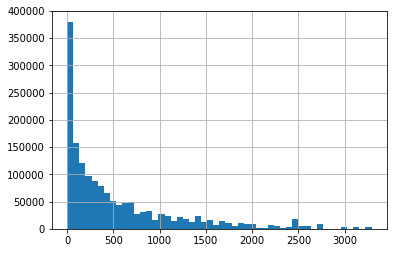

In [52]:
beers.review_count.hist(bins = 50)
plt.show

In [62]:
# review threshold
review_threshold = 200

well_reviewed = beers[beers.review_count > review_threshold]
best_beers = well_reviewed.groupby(['beer_beerid', 'beer_name'])['review_overall'].mean().sort_values(ascending = False)

best_beers.head(n=3)

beer_beerid  beer_name               
56082        Citra DIPA                  4.630952
16814        Heady Topper                4.625800
1545         Trappist Westvleteren 12    4.617925
Name: review_overall, dtype: float64

# Question 3
Question: Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer? <br>

Approach: (1) Do a linear regression and look at the p-values (2) Feature elimination random forest

**idea 1: Linear regression p_values**
not a great one... all p-values are small

In [69]:
X_values = beers[['review_aroma','review_taste', 'review_appearance', 'review_palate']]
y = beers.review_overall

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

X_train, X_test, y_train, y_test = train_test_split(X_values, y, test_size = 0.2)


regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor_score = regressor.score(X_test, y_test)

print('regressor_score: ', regressor_score)

regressor_score:  0.657271028228


In [71]:
import statsmodels.api as sm
from scipy import stats

est = sm.OLS(y, X_values)
est2 = est.fit()
print(est2.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 3.253e+07
Date:                Sat, 31 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:25:05   Log-Likelihood:            -8.9801e+05
No. Observations:             1586614   AIC:                         1.796e+06
Df Residuals:                 1586610   BIC:                         1.796e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
review_aroma          0.0694      0.00

** idea 2: feature importance in random forest** 

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rfr = RandomForestRegressor()
rfr.fit(X_values, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
features = X_values.keys()
feature_importance = list(zip(features, rfr.feature_importances_))

feature_importance

[('review_aroma', 0.0057300702381594994),
 ('review_taste', 0.9348540691046594),
 ('review_appearance', 0.0065412554810859308),
 ('review_palate', 0.052874605176095123)]

review taste is more important than the other features

# Question 4
Lastly, if I typically enjoy a beer due to its aroma and appearance (['review_aroma', 'review_appearance']), which beer style should I try?

In [81]:
beers.beer_style.unique().shape

(104,)

There are 104 different beer styles

In [87]:
beers_for_Sean = beers.groupby('beer_style').agg({'review_aroma': np.mean,
                                 'review_appearance': np.mean,
                                 'review_overall': np.mean})

beers_for_Sean.sort_values(['review_overall', 'review_aroma', 'review_appearance'], ascending = [False, False, False]).head()

,review_aroma,review_appearance,review_overall
beer_style,,,
American Wild Ale,4.126756,4.005451,4.093262
Gueuze,4.117574,4.034864,4.086287
Quadrupel (Quad),4.132533,4.117964,4.071630
Lambic - Unblended,4.118043,3.912478,4.048923
American Double / Imperial Stout,4.160665,4.163633,4.029820


In [100]:
dfbeers_for_Sean = pd.DataFrame(beers_for_Sean)

dfbeers_for_Sean.keys()

Index(['review_aroma', 'review_appearance', 'review_overall'], dtype='object')

Text(0.5,0,'overall')

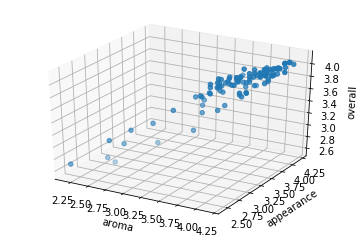

In [108]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfbeers_for_Sean.review_aroma, dfbeers_for_Sean.review_appearance, dfbeers_for_Sean.review_overall)
ax.set_xlabel('aroma')
ax.set_ylabel('appearance')
ax.set_zlabel('overall')